In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
import sklearn
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import os 
import pathlib 
import random
import matplotlib.image as mpimg

# Introduction to Convolution neural network and Computer vision with Tensorflow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front

## Inspect the data 



In [8]:

 # Walk through pizza_steak dir 

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak\test'.
There are 0 directories and 250 images in 'pizza_steak\test\pizza'.
There are 0 directories and 250 images in 'pizza_steak\test\steak'.
There are 2 directories and 0 images in 'pizza_steak\train'.
There are 0 directories and 750 images in 'pizza_steak\train\pizza'.
There are 0 directories and 750 images in 'pizza_steak\train\steak'.


In [3]:
# Get the classnames programmaticaly 


data_dir=pathlib.Path("pizza_steak/train/")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [5]:
# Let's visualize our images

def view_random_image(target_dir, target_class):
    # Setup the target directory
    target_folder=target_dir+target_class
    
    # Get a random image path
    random_image=random.sample(os.listdir(target_folder),1)
    print(random_image)
    
    # Read the image and plot
    img=mpimg.imread(target_folder+"/"+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    
    print(f"Image shape: {img.shape}")
    
    return img
    
    

['2011264.jpg']
Image shape: (512, 512, 3)


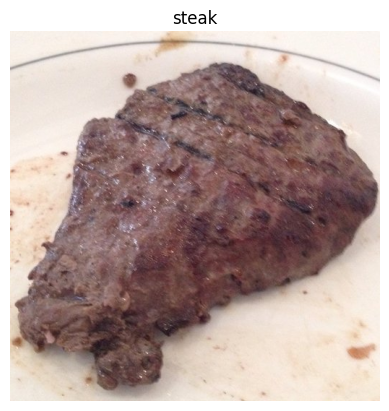

In [5]:
# view the random image from the training dataset

img=view_random_image(target_dir="pizza_steak/train/",target_class="steak")

In [6]:
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[245, 238, 230],
        [248, 241, 233],
        [249, 242, 234],
        ...,
        [252, 247, 243],
        [253, 248, 244],
        [254, 249, 245]],

       [[246, 239, 231],
        [249, 242, 234],
        [250, 243, 235],
        ...,
        [251, 246, 242],
        [252, 247, 243],
        [252, 247, 243]],

       [[247, 240, 232],
        [250, 243, 235],
        [250, 243, 235],
        ...,
        [250, 245, 241],
        [250, 245, 241],
        [250, 245, 241]],

       ...,

       [[245, 235, 226],
        [245, 235, 226],
        [244, 235, 226],
        ...,
        [245, 227, 207],
        [248, 227, 208],
        [248, 227, 208]],

       [[241, 231, 222],
        [243, 233, 224],
        [245, 235, 226],
        ...,
        [246, 225, 206],
        [248, 227, 208],
        [250, 229, 210]],

       [[238, 228, 219],
        [241, 231, 222],
        [245, 235, 226],
        ...,
        [243, 222, 20

## An end-to-end example 

Let's build a convolutional neural network to find patterns in our images, mpore specifically we need a way to:

* load our images
* preprocess our images 
* build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training

### 1. preprocess images

In [7]:
from keras.preprocessing.image import ImageDataGenerator

# set seed
tf.random.set_seed(42)

# Preprocess data (Normalization => Get all pixels values between 1 & 0)
train_datagen= ImageDataGenerator(rescale=1./255,
                                  rotation_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.3,
                                  horizontal_flip=True)
valid_datagen=ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories 
train_dir="/tensorflow_coursse/pizza_steak/train/"
test_dir="/tensorflow_coursse/pizza_steak/test/"



# Import data from directories and turn it into batches
train_data=train_datagen.flow_from_directory(train_dir, 
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)
test_data=valid_datagen.flow_from_directory(test_dir,
                                            batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


### 2. Build + Compile + Fit (Model)

In [8]:
# Build a CNN model (same as tine VGG)
model_over= tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,# Filters is the number of sliding windows going across an input (higher = more complex model)
                           kernel_size=3,# kernel size is the size of sliding window going across input 
                           strides=1,# the size of the step the sliding window takes across the input 
                           padding="valid",# if "same", output shape is same as input shape, if "valid" output gets compressed
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    # tf.keras.layers.MaxPool2D(pool_size=2,
    #                           padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    # tf.keras.layers.Conv2D(10,3,activation="relu"),
    # tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")   
])

# Compile our model
model_over.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit model 

history_over = model_over.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 59s 1s/step - loss: 0.7626 - accuracy: 0.6153 - val_loss: 0.5050 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 25s 525ms/step - loss: 0.5810 - accuracy: 0.6960 - val_loss: 0.5792 - val_accuracy: 0.7180
Epoch 3/5
47/47 [==============================] - 24s 506ms/step - loss: 0.5722 - accuracy: 0.7013 - val_loss: 0.4808 - val_accuracy: 0.7840
Epoch 4/5
47/47 [==============================] - 25s 520ms/step - loss: 0.5961 - accuracy: 0.6873 - val_loss: 0.5551 - val_accuracy: 0.7940
Epoch 5/5
47/47 [==============================] - 24s 512ms/step - loss: 0.5571 - accuracy: 0.7340 - val_loss: 0.4096 - val_accuracy: 0.8160


### Evaluating our model

<AxesSubplot: >

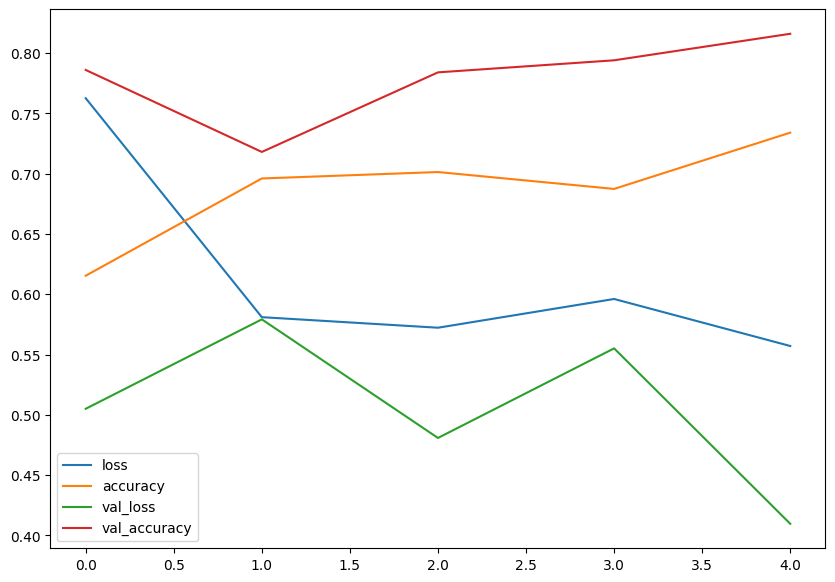

In [9]:
# plot training
pd.DataFrame(history_over.history).plot(figsize=(10,7))

In [10]:
# plot validation and training curves seperately 

def plot_loss_curves(history):
    loss=history.history["loss"]
    val_loss=history.history["val_loss"]
    
    accuracy=history.history["accuracy"]
    val_accuracy=history.history["val_accuracy"]
    
    epochs= range(len(history.history["loss"]))
    
    # Plot loss
    plt.plot(epochs,loss,label="training_loss")
    plt.plot(epochs,val_loss,label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()
    
    
     # Plot accuracy
    plt.figure()
    plt.plot(epochs,accuracy,label="training_accuracy")
    plt.plot(epochs,val_accuracy,label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()
    

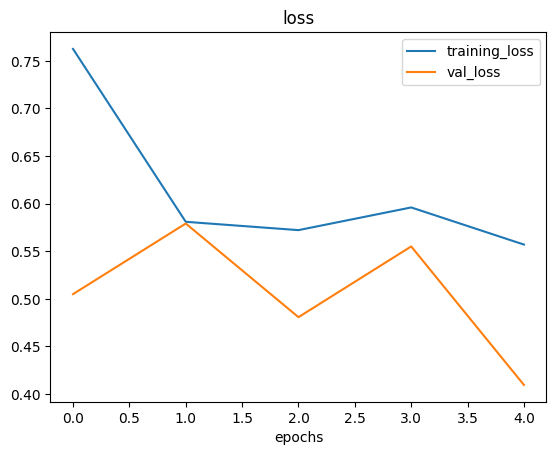

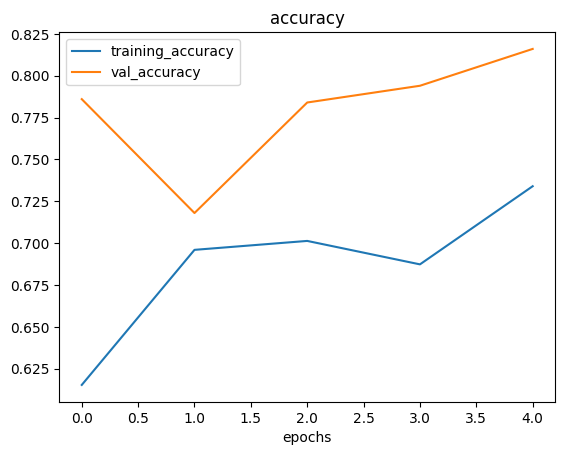

In [11]:
plot_loss_curves(history=history_over)

### Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* add another dense layer to the output of our flattened layer

### Reduce overfitting:

* Add data augmentation
* Add regulariization layers (MaxPool2D)
* Add more data

In [12]:
# Build a CNN model (same as tine VGG)
model_regular= tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(10,3, activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    # tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")   
])

# Compile our model
model_regular.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit model 

history_regular = model_regular.fit(train_data,
                    epochs=7,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))


Epoch 1/7
47/47 [==============================] - 28s 562ms/step - loss: 0.6816 - accuracy: 0.5607 - val_loss: 0.6018 - val_accuracy: 0.7720
Epoch 2/7
47/47 [==============================] - 25s 541ms/step - loss: 0.5712 - accuracy: 0.7167 - val_loss: 0.4780 - val_accuracy: 0.7560
Epoch 3/7
47/47 [==============================] - 24s 520ms/step - loss: 0.5602 - accuracy: 0.7013 - val_loss: 0.3992 - val_accuracy: 0.8320
Epoch 4/7
47/47 [==============================] - 23s 485ms/step - loss: 0.5246 - accuracy: 0.7593 - val_loss: 0.4301 - val_accuracy: 0.8040
Epoch 5/7
47/47 [==============================] - 27s 567ms/step - loss: 0.5089 - accuracy: 0.7593 - val_loss: 0.3687 - val_accuracy: 0.8340
Epoch 6/7
47/47 [==============================] - 23s 493ms/step - loss: 0.4868 - accuracy: 0.7753 - val_loss: 0.3465 - val_accuracy: 0.8460
Epoch 7/7
47/47 [==============================] - 24s 514ms/step - loss: 0.4668 - accuracy: 0.7773 - val_loss: 0.4370 - val_accuracy: 0.7940


In [13]:
model_regular.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 10)      

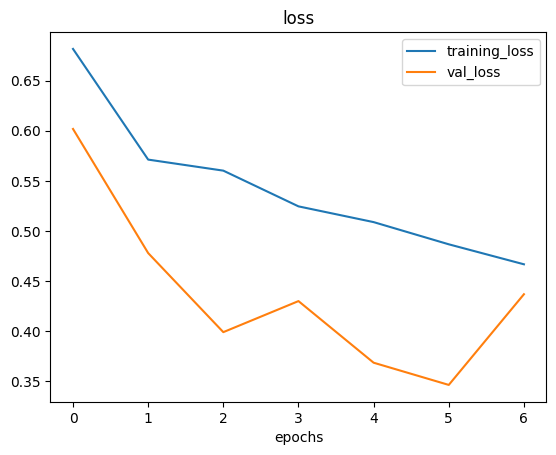

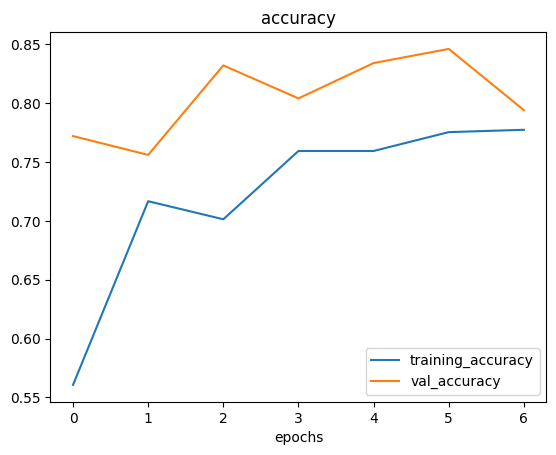

In [14]:
plot_loss_curves(history=history_regular)

In [18]:
def load_and_prep_image(filename, img_shape=224):
    img=tf.io.read_file(filename)
    img=tf.image.decode_image(img)
    img=tf.image.resize(img,size=[img_shape,img_shape])
    img=img/255.
    return img

In [19]:
steak=load_and_prep_image(filename="03-steak.jpeg")

In [22]:
pred =model_regular.predict(tf.expand_dims(steak,axis=0))

In [23]:
pred_class=class_names[int(tf.round(pred))]
pred_class

'steak'

In [24]:
def pred_and_plot(model,filename,class_names=class_names):
    img=load_and_prep_image(filename)
    
    pred=model.predict(tf.expand_dims(img,axis=0))
    
    pred_class=class_names[int(tf.round(pred))]
    
    plt.imshow(img)
    plt.title(f"Prediction : {pred_class} ")
    plt.axis(False)

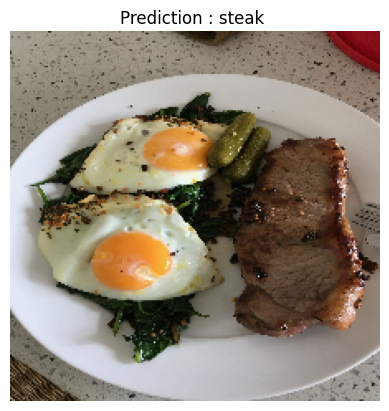

In [25]:
pred_and_plot(model=model_regular,filename="03-steak.jpeg",)

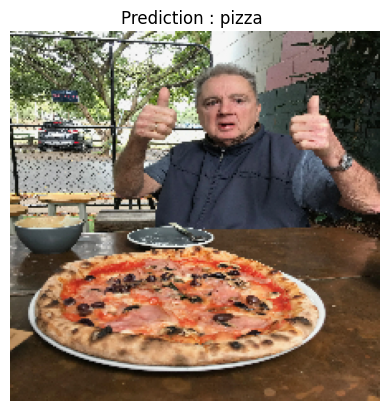

In [26]:
pred_and_plot(model=model_regular,filename="03-pizza-dad.jpeg",)

## try on non CNN model

In [15]:
tf.random.set_seed(42)

# Create a model 

model_1=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),
    
])



# Compile our model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit model 

history_1 = model_1.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 532ms/step - loss: 5.7235 - accuracy: 0.5773 - val_loss: 1.3259 - val_accuracy: 0.7200
Epoch 2/5
47/47 [==============================] - 25s 527ms/step - loss: 1.2970 - accuracy: 0.6153 - val_loss: 0.5800 - val_accuracy: 0.7360
Epoch 3/5
47/47 [==============================] - 24s 508ms/step - loss: 1.2859 - accuracy: 0.6113 - val_loss: 0.5380 - val_accuracy: 0.7420
Epoch 4/5
47/47 [==============================] - 24s 519ms/step - loss: 1.7307 - accuracy: 0.5940 - val_loss: 0.5688 - val_accuracy: 0.7820
Epoch 5/5
47/47 [==============================] - 24s 506ms/step - loss: 0.9450 - accuracy: 0.6453 - val_loss: 0.5550 - val_accuracy: 0.7260


In [16]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_2 (Dense)             (None, 128)               19267712  
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 19,278,081
Trainable params: 19,278,081
Non-trainable params: 0
_________________________________________________________________


## Become one with the data

['536535.jpg']
Image shape: (306, 512, 3)
['2241448.jpg']
Image shape: (512, 512, 3)


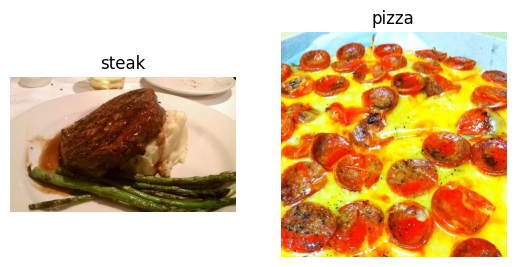

In [17]:
# Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/","pizza")

### Multi-class Classification

In [3]:
train_dir="10_food_classes_all_data/train/"
test_data="10_food_classes_all_data/test/"

In [4]:
import pathlib

data_dir = pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))

print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['701210.jpg']
Image shape: (384, 512, 3)


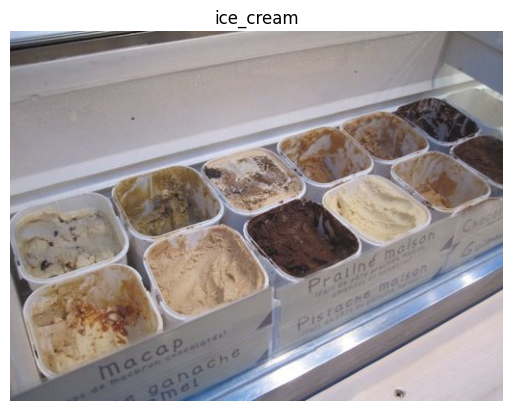

In [13]:
img=view_random_image(target_dir=train_dir,
                      target_class=random.choice(class_names)
                      )